# Libraries

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Read dan Normalisasi Gambar

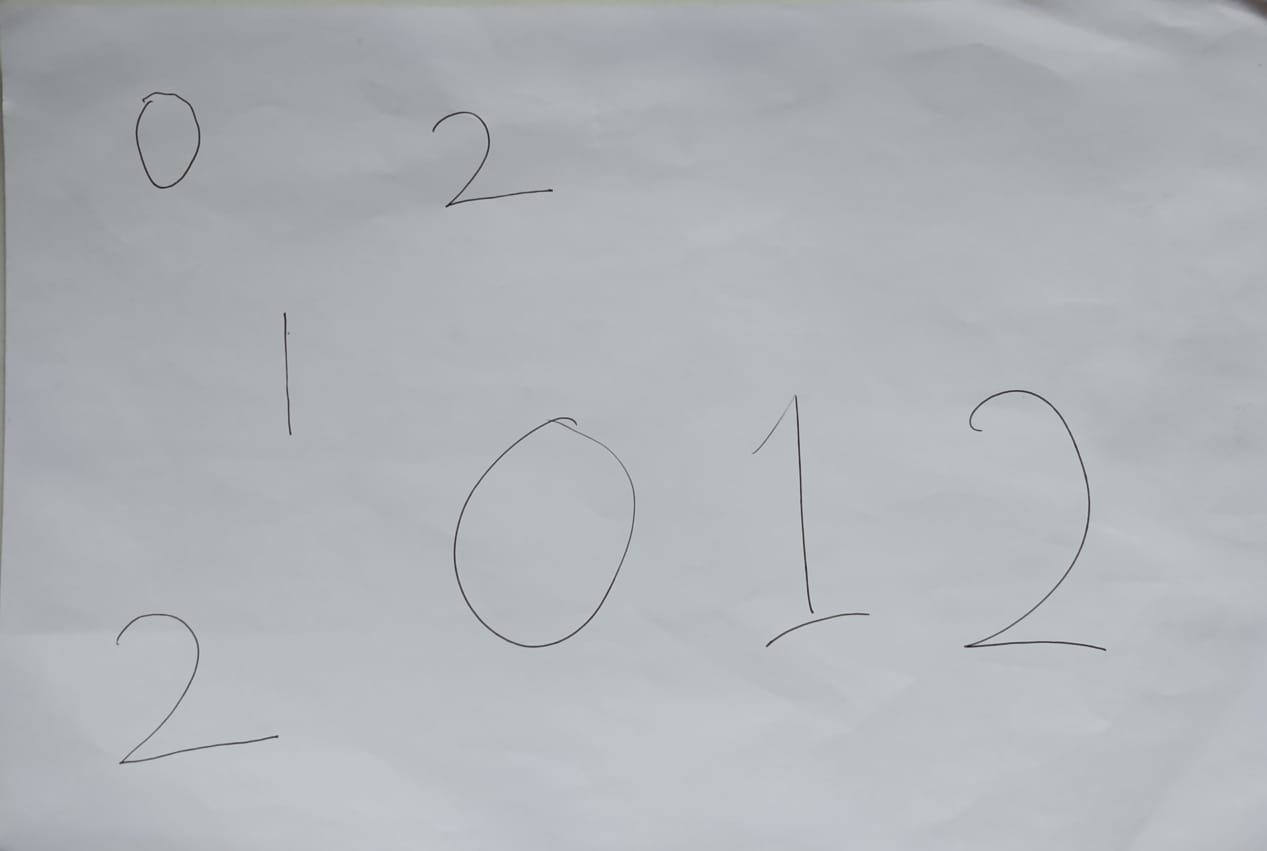

In [2]:
image = cv.imread('drive/My Drive/BCML/CV/number_samp/number_samp.jpeg')

image_orig = image.copy()

cv2_imshow(image)

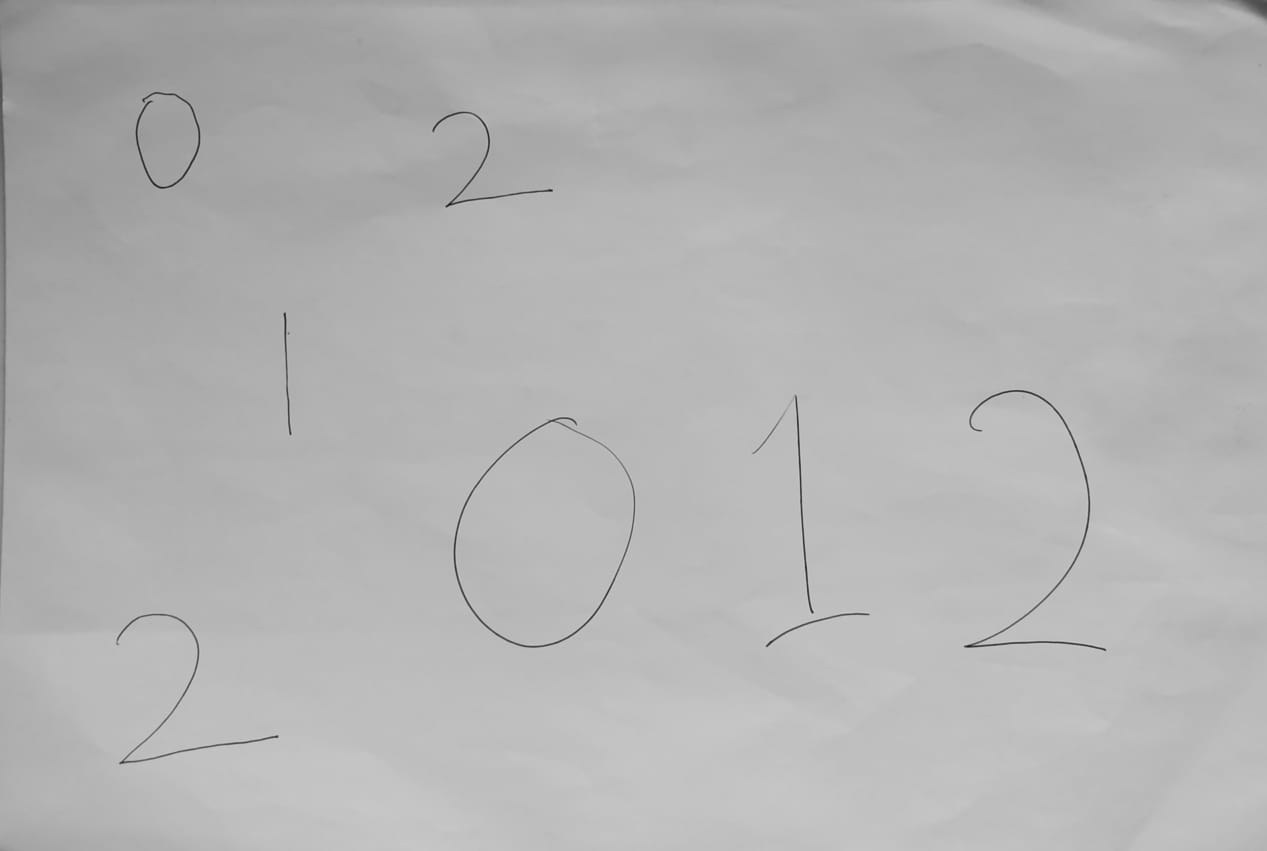

In [3]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv2_imshow(image)

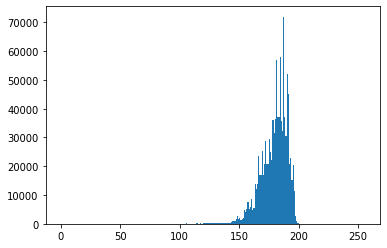

In [4]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

140.0


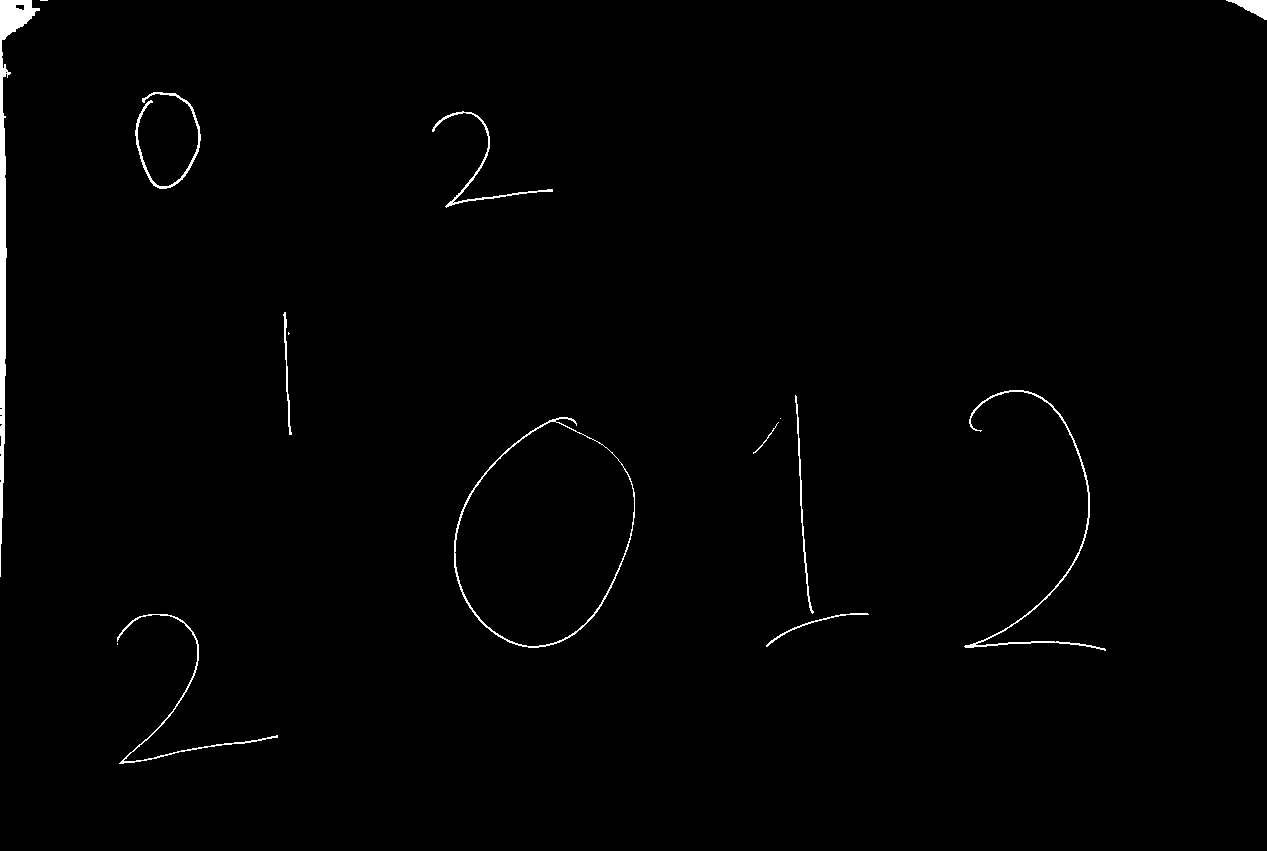

In [5]:
threshold_value, threshold_result = cv.threshold(image, 140, 255, cv.THRESH_BINARY_INV)

print(threshold_value)

cv2_imshow(threshold_result)

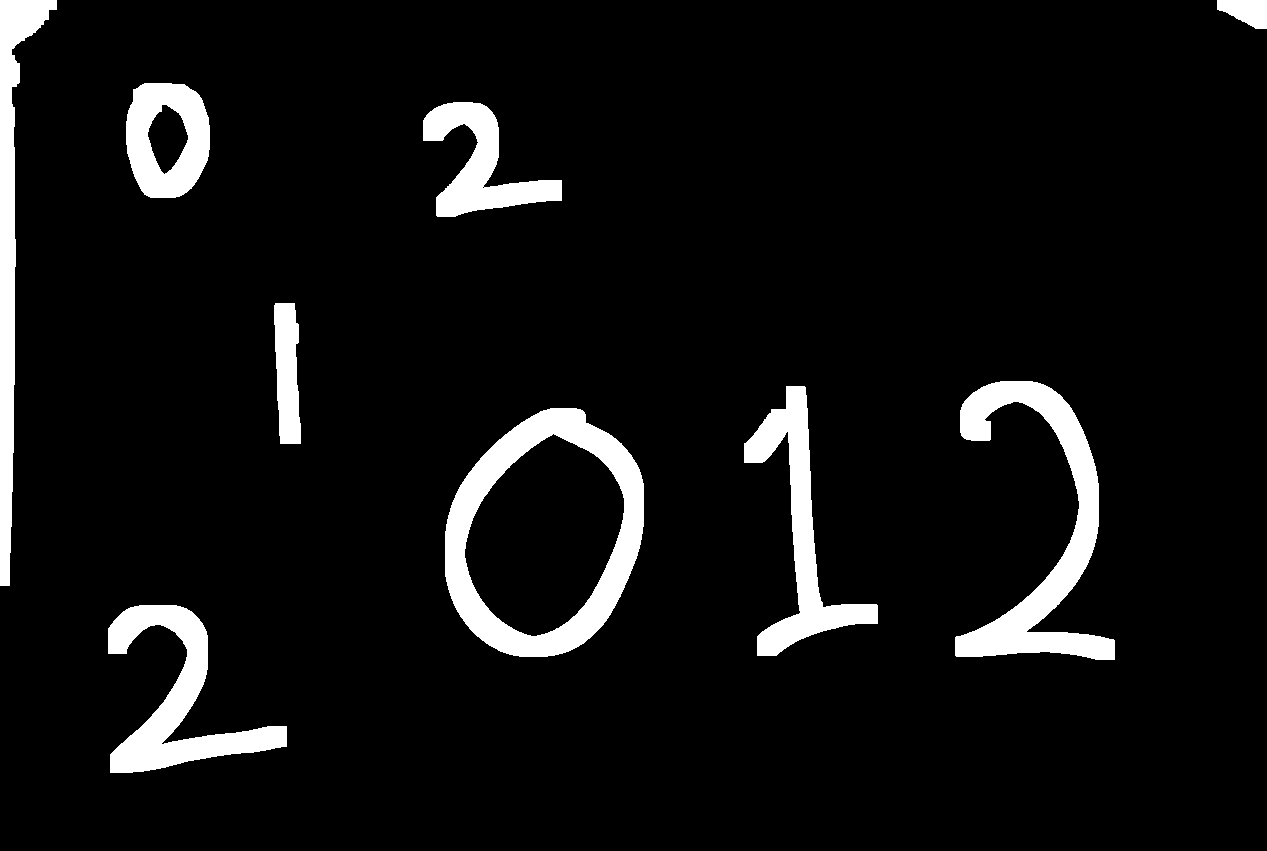

In [6]:
kernel = np.ones((7,7),np.uint8)
threshold_result = cv.dilate(threshold_result,kernel,iterations = 3)
cv2_imshow(threshold_result)

# Contouring

In [7]:
thresholding_result = threshold_result

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

Contour #0 108 605 179 168 9748.0


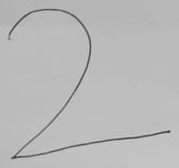

Contour #1 445 408 199 249 37796.5


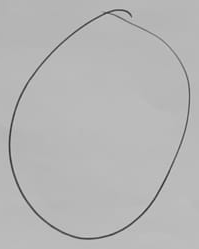

Contour #2 744 386 134 270 8797.5


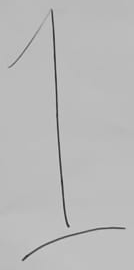

Contour #3 955 381 160 279 12980.5


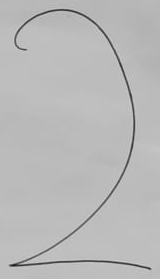

Contour #4 274 303 27 141 2868.5


Contour #5 423 102 139 115 6299.0


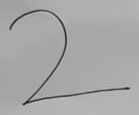

Contour #6 126 83 84 115 7966.5


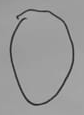

Contour #7 1217 0 50 29 971.5


Contour #8 0 0 57 586 8903.5


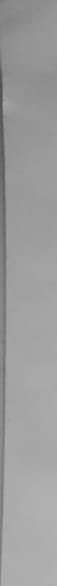

In [8]:
image_h = image.shape[0]
image_w = image.shape[1]
image_a = image_h*image_w
for index, contour in enumerate(contours):
  area = cv.contourArea(contour)
  if area > 0.00001*image_a:
    x, y, w, h = cv.boundingRect(contour)
    print("Contour #" + str(index), x, y, w, h, area)
    cv2_imshow(image[y:y+h, x:x+w])

# Bounding Box

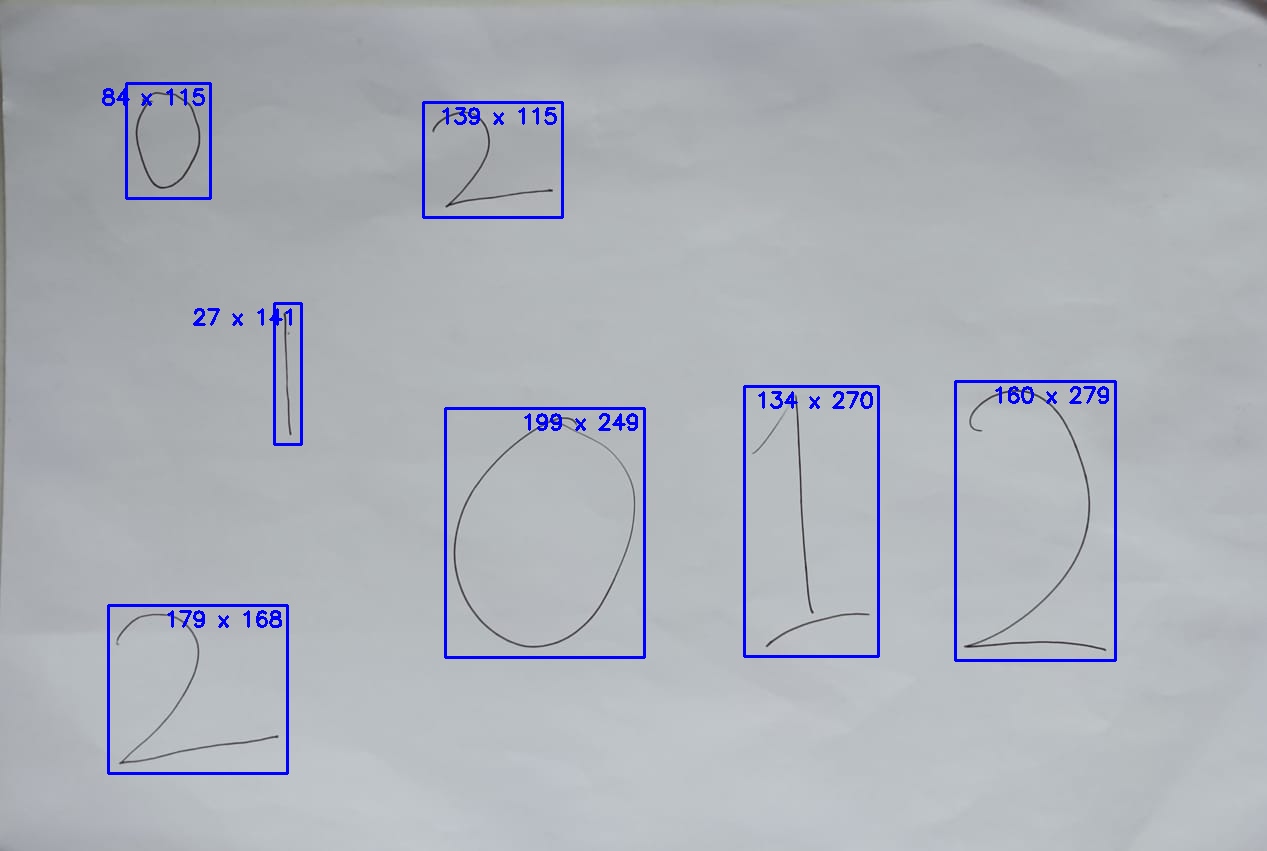

In [9]:
concon = (contours[0], contours[1], contours[2], contours[3], contours[4], contours[5], contours[6])
for value in concon:
  x, y, w, h = cv.boundingRect(value)

  phone = image[y:y+h, x:x+w]
  cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
  ori2 = image_orig
  text = "%s x %s" % (w,h)
  font = cv.FONT_HERSHEY_SIMPLEX
  fontscale = 0.7
  thickness = 2

  indent = cv.getTextSize(text, font, fontscale, thickness)[0]
  org = (x+w-indent[0])-3,y+indent[1]+5
  color = (255,0,0)
  cv.putText(ori2, text, org, font, fontscale, color, thickness)
  
cv2_imshow(image_orig)